In [132]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

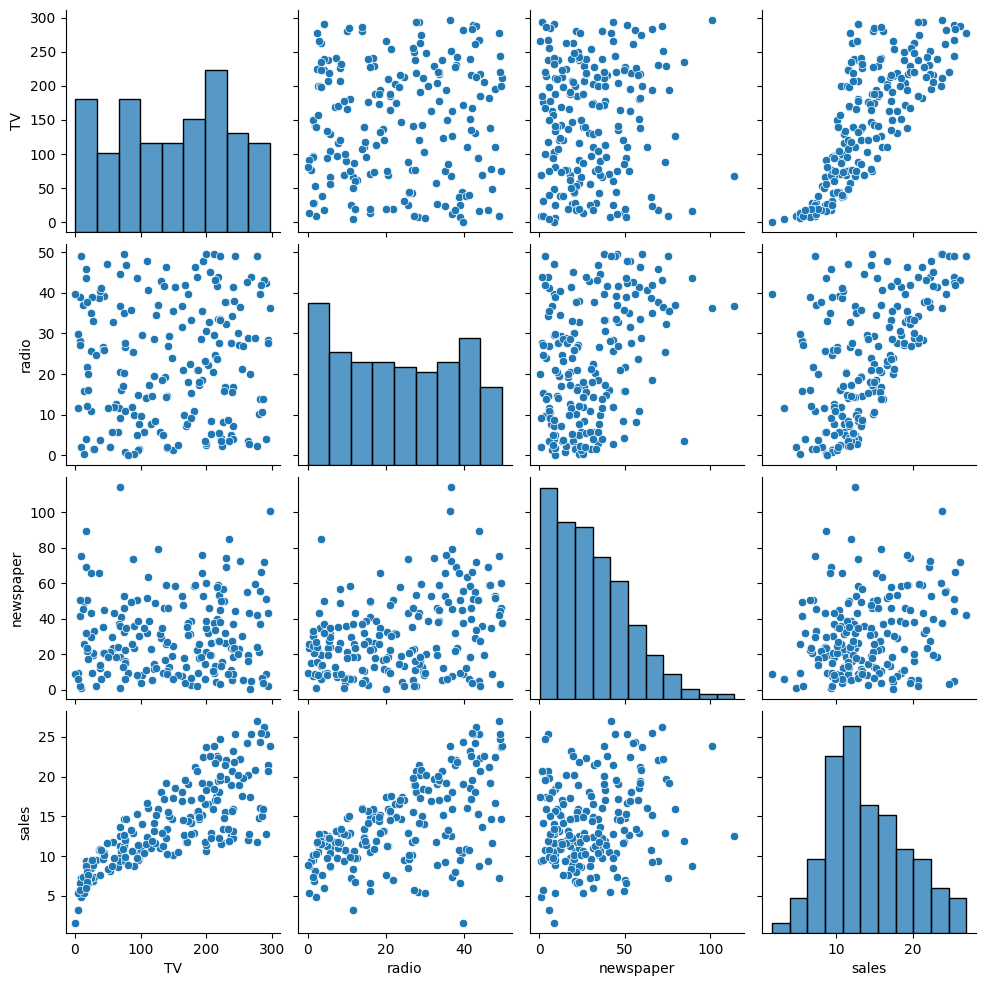

In [12]:
sns.pairplot(df)

In [13]:
X = df[['TV']]
y = df['sales']

In [21]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
modelo_linear = LinearRegression()

In [23]:
modelo_linear.fit(X_train,y_train)

LinearRegression()

In [28]:
vendas = modelo_linear.predict([[300,]])

/home/msus/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
X_test

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3
115,75.1
69,216.8
170,50.0
174,222.4
45,175.1


In [31]:
y_pred = modelo_linear.predict(X_test)

In [32]:
y_pred

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

In [34]:
df_1 = X_test.copy()

In [36]:
df_1['Previsao_vendas'] = y_pred

In [39]:
mse = mean_squared_error(y_test, y_pred)

In [40]:
mse

10.204654118800956

In [41]:
rmse = root_mean_squared_error(y_test, y_pred)

In [42]:
rmse

3.194472431998898

In [43]:
r = r2_score(y_test, y_pred)

In [44]:
r

0.6766954295627076

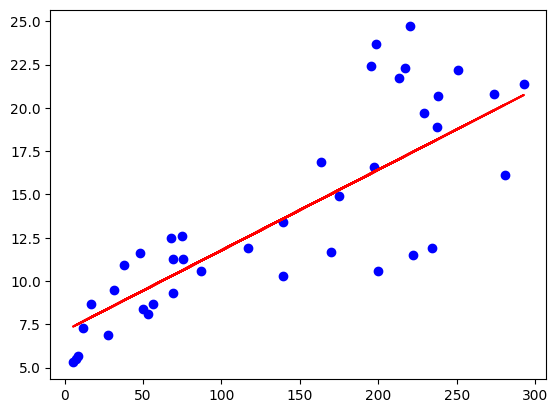

In [48]:
plt.scatter(X_test, y_test, color='blue', label="Dados Reais ")
plt.plot(X_test, y_pred, color='red',label = 'Dados previstos' )

In [49]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [50]:
X = df[['TV','radio', 'newspaper']]
y = df['sales']
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)
modelo_linear_mult = LinearRegression()
modelo_linear_mult.fit( X_train, y_train)
y_pred = modelo_linear_mult.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f' Error quadrado : {mse}, Raiz do error quadrador : {rmse}, Score: {r2} ')

In [51]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)

In [53]:
modelo_linear_mult = LinearRegression()

In [54]:
modelo_linear_mult.fit( X_train, y_train)

LinearRegression()

In [55]:
y_pred = modelo_linear_mult.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred) 
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
print(f' Error quadrado : {mse}, Raiz do error quadrador : {rmse}, Score: {r2} ')

 Error quadrado : 3.174097353976104, Raiz do error quadrador : 1.7815996615334502, Score: 0.899438024100912 


In [60]:
modelo_linear_mult.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [61]:
X = df[['TV','radio']]
y = df['sales']
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)
modelo_linear_mult = LinearRegression()
modelo_linear_mult.fit( X_train, y_train)
y_pred = modelo_linear_mult.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f' Error quadrado : {mse}, Raiz do error quadrador : {rmse}, Score: {r2} ')

 Error quadrado : 3.137948009068354, Raiz do error quadrador : 1.7714254173033517, Score: 0.9005833101920356 


In [73]:
X = df[['TV','radio', 'newspaper' ]]
y = df['sales']

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)
modelo_linear_mult = LinearRegression()
modelo_linear_mult.fit( X_train, y_train)
y_pred = modelo_linear_mult.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f' Error quadrado : {mse}, Raiz do error quadrador : {rmse}, Score: {r2} ')

residos = y_pred - y_test


 Error quadrado : 3.174097353976104, Raiz do error quadrador : 1.7815996615334502, Score: 0.899438024100912 


In [67]:
residos

95     -0.973430
15     -3.202758
30     -6.166735
158     9.685057
128    -5.356098
115     4.016799
69     -3.935442
170     3.382107
174    -1.396224
45     -0.872635
66      4.884745
182     1.910237
165    -1.626811
78     10.178438
186    -0.428418
177    -0.650158
56      9.688382
152    -2.450993
82      2.282804
68     -3.905335
124    -3.580899
16      4.586674
148     6.697077
93     -5.232169
65      1.973519
60      1.738981
84     -3.502680
67     -1.048141
125     1.240457
132     9.212691
9      -0.639603
18      2.289882
55     -4.140631
75      9.770895
150    -3.806706
104    -4.337402
135     7.350131
137    -5.405861
164     0.481147
76      2.856068
Name: sales, dtype: float64

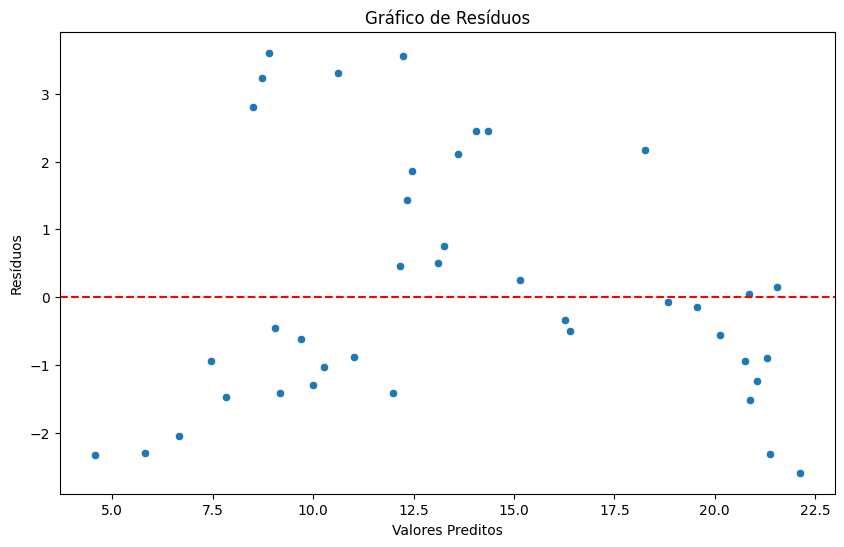

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()


In [76]:
mse

3.174097353976104

In [79]:
np.sqrt(mse)

1.7815996615334502

In [81]:
rmse = mse **0.5

In [82]:
!pip install scikit-learn

1.7815996615334502

In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv')

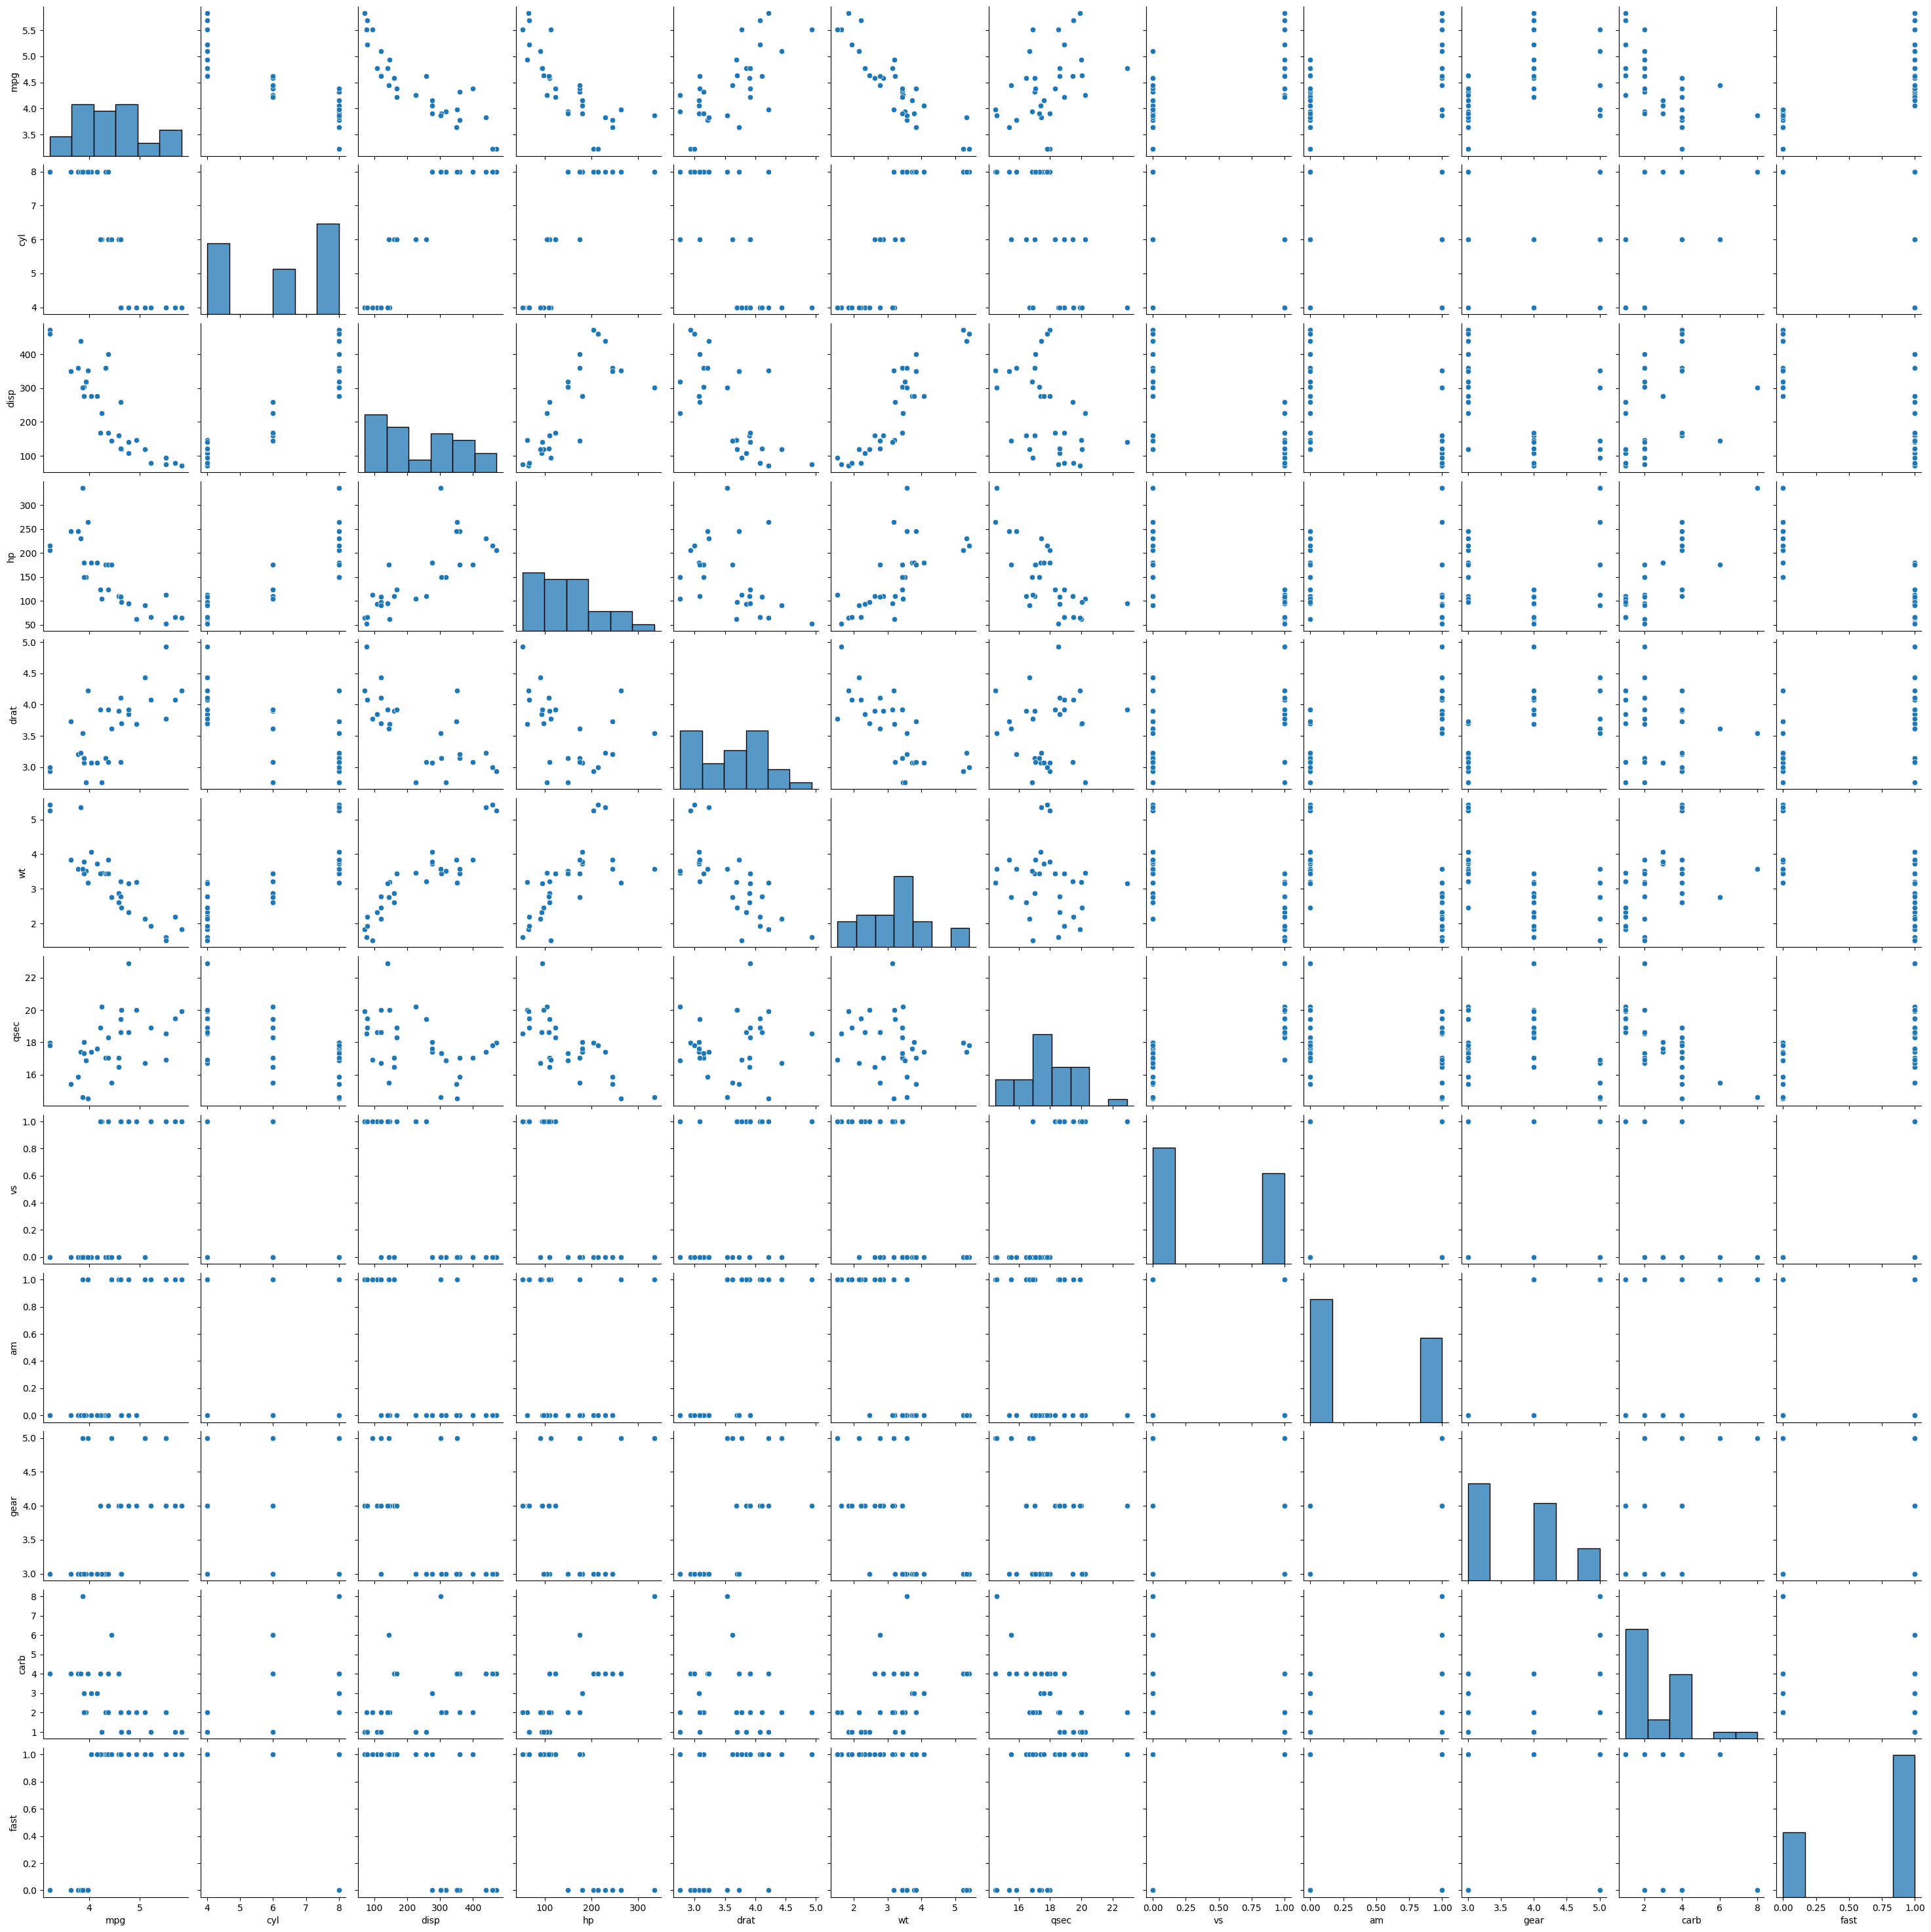

In [90]:
sns.pairplot(df)

In [91]:
df.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb', 'fast', 'cars', 'carname'],
      dtype='object')

In [92]:
X = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb', 'fast']]
y = df['mpg']

In [93]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)

In [94]:
model = LinearRegression()

In [96]:
model.fit(X_train,y_train)

LinearRegression()

In [101]:
y_pred = model.predict(X_test)

In [102]:
y_pred

array([4.44431145, 3.36702333, 4.19595235, 5.17760146, 5.23808822,
       4.3085264 , 3.72734844])

In [107]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse_calc = mse**0.5
np.sqrt(mse)

In [105]:
rmse

0.28298407612059434

In [106]:
r2

0.8384872277747729

In [108]:
rmse_calc

0.28298407612059434

In [109]:
np.sqrt(mse)

0.28298407612059434

In [110]:
model.coef_

array([-0.0420752 ,  0.00183329, -0.00074061,  0.13394409, -0.46997073,
        0.15396024, -0.18701988,  0.07741418,  0.13698414, -0.01464895,
        0.24575415])

In [111]:
X.keys()

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb',
       'fast'],
      dtype='object')

In [124]:
model_lasso = Lasso(alpha=0.01)

In [125]:
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [126]:
model_lasso.coef_

array([-5.33828406e-02,  5.01604634e-05, -2.65338320e-03,  6.41667310e-02,
       -2.68336565e-01,  2.36444200e-03,  0.00000000e+00,  0.00000000e+00,
        7.66958716e-02, -3.29463552e-02,  9.19309366e-02])

In [128]:
y_pred = model_lasso.predict(X_test)

In [129]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse_calc = mse**0.5
np.sqrt(mse)

0.2735024696527947

In [130]:
rmse

0.2735024696527947

In [131]:
r2

0.8491291350507069

In [133]:
model_l2 = Ridge(alpha=1.0)

In [135]:
model_l2.fit(X_train, y_train)

Ridge()

In [136]:
y_pred = model_l2.predict(X_test)

In [137]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [138]:
mse

0.067951800899169

In [139]:
r2

0.8629484830632921

In [140]:
rmse

0.2606756622685919

In [141]:
import statsmodels.api as sm

In [142]:
!pip install -U statsmodels

Defaulting to user installation because normal site-packages is not writeable
